# Fraudulent Insurance Claims Detection System

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
df1 = pd.read_excel("D:/Data Science Course PR/Capstone Projects/1.Fraudulent Insurance claims Analysis - Machine Learning/Data/sheet 1.xlsx")
df2 = pd.read_excel("D:/Data Science Course PR/Capstone Projects/1.Fraudulent Insurance claims Analysis - Machine Learning/Data/sheet 2.xlsx")
df3 = pd.read_excel("D:/Data Science Course PR/Capstone Projects/1.Fraudulent Insurance claims Analysis - Machine Learning/Data/sheet 3.xlsx")
df4 = pd.read_excel("D:/Data Science Course PR/Capstone Projects/1.Fraudulent Insurance claims Analysis - Machine Learning/Data/sheet 4.xlsx")

In [3]:
n = df3[df3.duplicated() == True].reset_index()
dulicate = n.loc[:,'index'].to_list()

In [4]:
df3.drop(index = dulicate,inplace= True)
df2.drop(index = dulicate,inplace= True)
df1.drop(index = dulicate,inplace= True)
df4.drop(index = dulicate,inplace= True)

In [5]:
df1['PolicyNumber'] = df3['PolicyNumber'] 
df2['PolicyNumber'] = df3['PolicyNumber'] 
df4['PolicyNumber'] = df3['PolicyNumber'] 

In [6]:
df = df1.merge(df2,on='PolicyNumber')
df = df.merge(df3 , on = 'PolicyNumber' )
df = df.merge(df4 , on = 'PolicyNumber' )

In [7]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,PolicyNumber,Sex,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,1,Female,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,2,Male,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,3,Male,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,4,Male,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,5,Female,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [8]:
# Checking Null values
df.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
PolicyNumber            0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [9]:
# Checking Duplicate values in our data frame
df.duplicated().sum()

0

In [10]:
df.describe()

,WeekOfMonth,WeekOfMonthClaimed,PolicyNumber,Age,FraudFound_P,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,7710.500000,39.855707,0.059857,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,4451.514911,13.492377,0.237230,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,3855.750000,31.000000,0.000000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,7710.500000,38.000000,0.000000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,11565.250000,48.000000,0.000000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,15420.000000,80.000000,1.000000,16.000000,700.000000,4.000000,1996.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   PolicyNumber          15420 non-null  int64 
 9   Sex                   15420 non-null  object
 10  MaritalStatus         15420 non-null  object
 11  Age                   15420 non-null  int64 
 12  Fault                 15420 non-null  object
 13  PolicyType            15420 non-null  object
 14  VehicleCategory       15420 non-null  object
 15  VehiclePrice          15420 non-null

In [12]:
# Cheaking Data in Balance or In-Balance
df.FraudFound_P.sum()/df.shape[0]*100

5.985732814526589

#### Our data is inbalance as only 6 % of data have  1 in it

In [13]:
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed',
       'PolicyNumber', 'Sex', 'MaritalStatus', 'Age', 'Fault', 'PolicyType',
       'VehicleCategory', 'VehiclePrice', 'FraudFound_P', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

## Data Manipulation

In [14]:
df['DayOfWeekClaimed'].unique()

array(['Tuesday', 'Monday', 'Thursday', 'Friday', 'Wednesday', 'Saturday',
       'Sunday', 0], dtype=object)

In [15]:
df['DayOfWeekClaimed'].replace([0],[df['DayOfWeekClaimed'].mode()],inplace=True)

In [16]:
df['DayOfWeekClaimed'].unique()

array(['Tuesday', 'Monday', 'Thursday', 'Friday', 'Wednesday', 'Saturday',
       'Sunday'], dtype=object)

<AxesSubplot:xlabel='Age'>

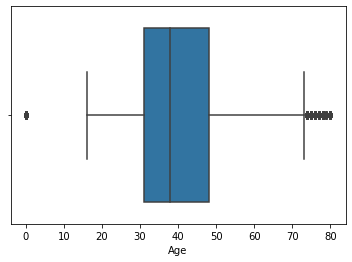

In [17]:
# We can see their is some Outliers in our Age section
sns.boxplot(df.Age)

In [18]:
# We will replace 0 , with eith 16 or 17
df.Age.replace([0],[17],inplace = True)

<AxesSubplot:xlabel='Age'>

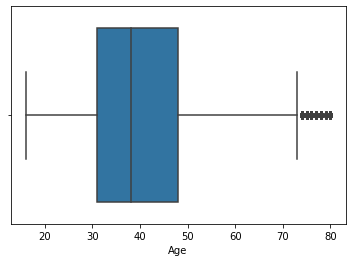

In [19]:
sns.boxplot(df.Age)

In [20]:
df.Days_Policy_Accident.unique()

array(['more than 30', '15 to 30', 'none', '1 to 7', '8 to 15'],
      dtype=object)

In [21]:
df.Days_Policy_Accident.replace(['none'], [df.Days_Policy_Accident.mode()],inplace = True)

In [22]:
df.Days_Policy_Accident.unique()

array(['more than 30', '15 to 30', '1 to 7', '8 to 15'], dtype=object)

In [23]:
df['MonthClaimed'].unique()

array(['Jan', 'Nov', 'Jul', 'Feb', 'Mar', 'Dec', 'Apr', 'Aug', 'May',
       'Jun', 'Sep', 'Oct', 0], dtype=object)

In [24]:
df.MonthClaimed.replace([0],[df['MonthClaimed'].mode()],inplace=True)

# EDA

### Univariate analysis of each variable

In [25]:
Make = df['Make'].value_counts().reset_index()

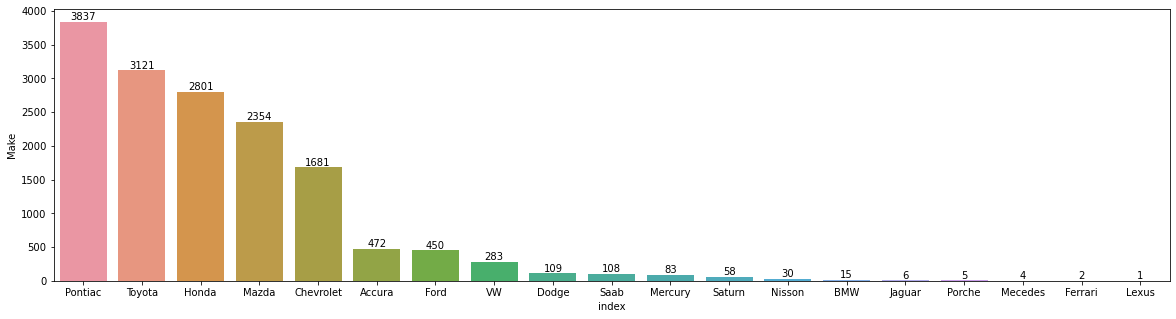

In [26]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x ='index',y = 'Make' , data = Make )
ax.bar_label(ax.containers[0])[0]
plt.show()

### Observations
Top 5 Car Brands on which Claim has made:
- Pontaiac
- Toyota
- Honda
- Mazda
- Chevrolet

In [27]:
AccidentArea = df['AccidentArea'].value_counts().reset_index()
AccidentArea

,index,AccidentArea
0,Urban,13822
1,Rural,1598


[]

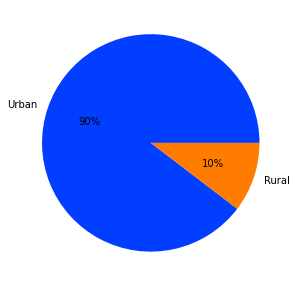

In [28]:
x = AccidentArea['AccidentArea'].tolist()
y = AccidentArea['index'].tolist()
plt.figure(figsize=(5,5))
palette_color = sns.color_palette('bright')
plt.pie(x, labels=y,colors=palette_color, autopct='%.0f%%')[0]
plt.plot()

In [29]:
MonthClaimed = df['MonthClaimed'].value_counts().reset_index()
MonthClaimed

,index,MonthClaimed
0,Jan,1447
1,May,1411
2,Mar,1348
3,Oct,1339
4,Jun,1293
5,Feb,1287
6,Nov,1285
7,Apr,1271
8,Sep,1242
9,Jul,1225


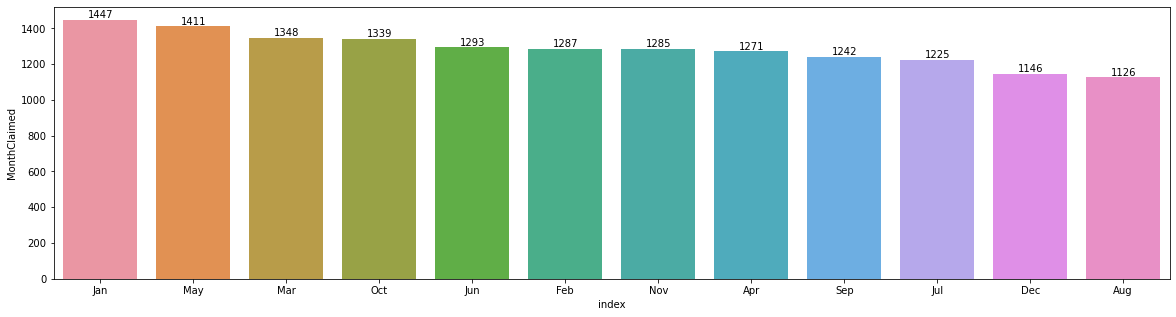

In [30]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x ='index',y = 'MonthClaimed' , data = MonthClaimed )
ax.bar_label(ax.containers[0])[0]
plt.show()

- In this we dont find any pattern

In [31]:
# DayOfWeekClaimed = Day of the week the accident was claimed, "control zeros"
DayOfWeekClaimed = df['DayOfWeekClaimed'].value_counts().reset_index()
DayOfWeekClaimed

,index,DayOfWeekClaimed
0,Monday,3758
1,Tuesday,3375
2,Wednesday,2951
3,Thursday,2660
4,Friday,2497
5,Saturday,127
6,Sunday,52


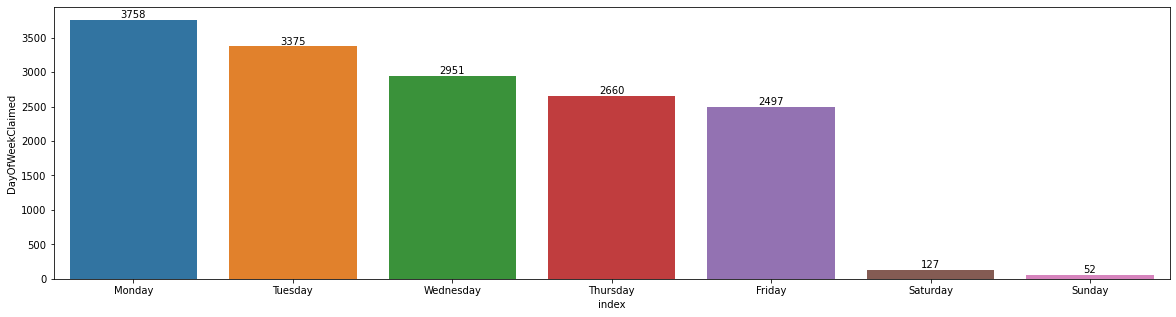

In [32]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x ='index',y = 'DayOfWeekClaimed' , data = DayOfWeekClaimed )
ax.bar_label(ax.containers[0])[0]
plt.show()

### Observations
- Most of accidents is happens on staring of week and than we can see drop in the accidents.
- Approx 99 % of accidents happened on workingdays as we can see less than 1 % accidents is happend on weekends
- This is maybe because of morring office rush  or evening rush we dont have data for that we cant say for sure but looking the weekend accident rate we can safely assues this conditions.  

In [33]:
# Sex =  Gender of the person involved in the accident
Gender = df['Sex'].value_counts().reset_index()
Gender

,index,Sex
0,Male,13000
1,Female,2420


[]

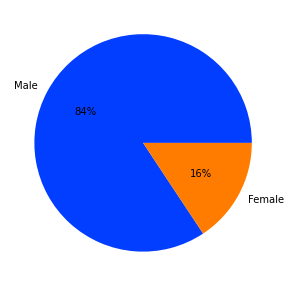

In [34]:
x = Gender['index'].tolist()
y = Gender['Sex'].tolist()
plt.figure(figsize=(5,5))
palette_color = sns.color_palette('bright')
plt.pie(y, labels=x,colors=palette_color, autopct='%.0f%%')[0]
plt.plot()

- 84% of male involved in accident and 16% of female involved in accident 

In [35]:
# MaritalStatus = Marital status of the person involved in the accident
MaritalStatus = df['MaritalStatus'].value_counts().reset_index()
MaritalStatus

,index,MaritalStatus
0,Married,10625
1,Single,4684
2,Divorced,76
3,Widow,35


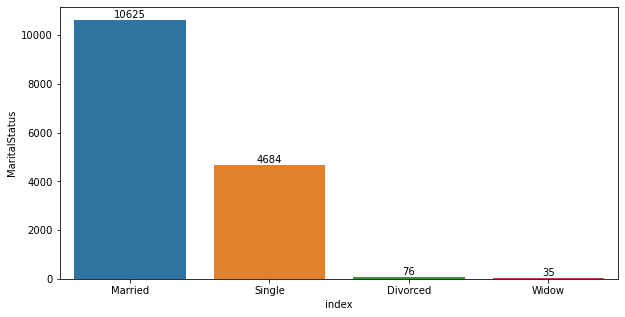

[]

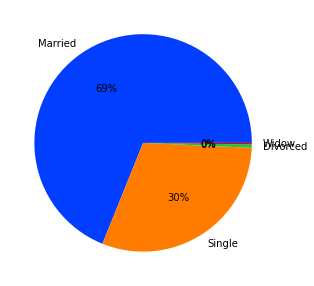

In [36]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x ='index',y = 'MaritalStatus' , data = MaritalStatus )
ax.bar_label(ax.containers[0])[0]
plt.show()


x = MaritalStatus['index'].tolist()
y = MaritalStatus['MaritalStatus'].tolist()
plt.figure(figsize=(5,5))
palette_color = sns.color_palette('bright')
plt.pie(y, labels=x,colors=palette_color, autopct='%.0f%%')[0]
plt.plot()

- 69% of Married person involved in the accident 
- 30% of Single person involved in the accident

In [37]:
Age = df.Age.value_counts().reset_index()


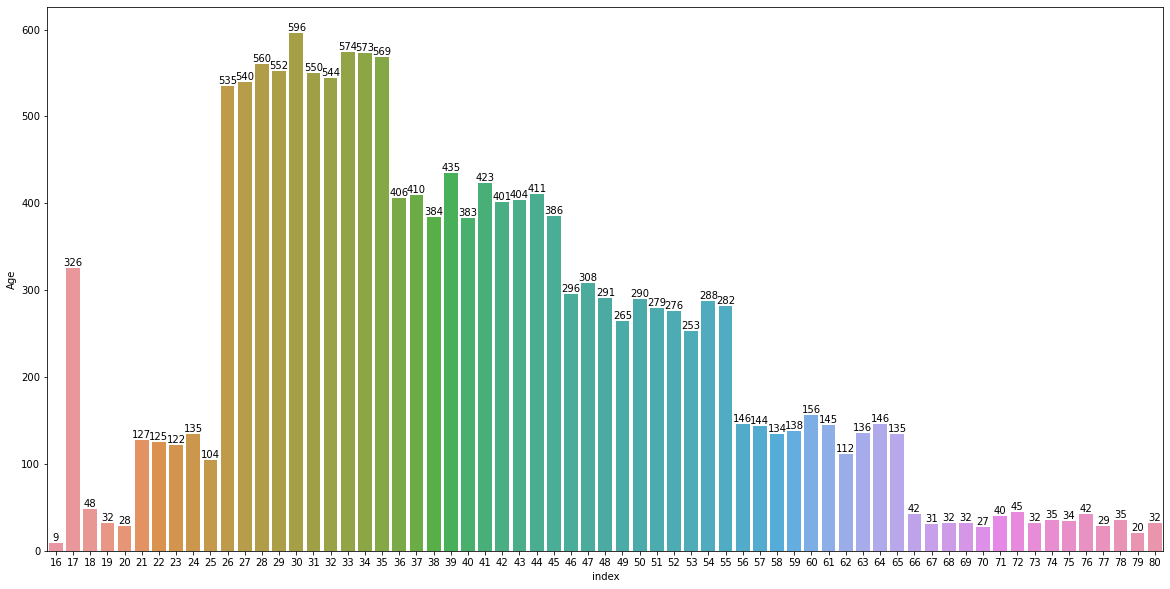

In [38]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x ='index',y = 'Age' , data = Age )
ax.bar_label(ax.containers[0])[0]
plt.show()

- In this graph we can not say much but we can see after certain age group no of accident is decreases.  

In [39]:
# Fault = If the insurance owner was responsible of the accident
Fault = df['Fault'].value_counts().reset_index()
Fault

,index,Fault
0,Policy Holder,11230
1,Third Party,4190


[]

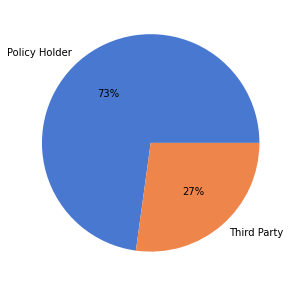

In [40]:
x = Fault['index'].tolist()
y = Fault['Fault'].tolist()
plt.figure(figsize=(5,5))
palette_color = sns.color_palette('muted')
plt.pie(y, labels=x,colors=palette_color, autopct='%.0f%%')[0]
plt.plot()

- In this chart we can clearly see the that 73% of time Fault is of Policy Holder.

In [41]:
PolicyType = df['PolicyType'].value_counts().reset_index()
PolicyType

,index,PolicyType
0,Sedan - Collision,5584
1,Sedan - Liability,4987
2,Sedan - All Perils,4087
3,Sport - Collision,348
4,Utility - All Perils,340
5,Utility - Collision,30
6,Sport - All Perils,22
7,Utility - Liability,21
8,Sport - Liability,1


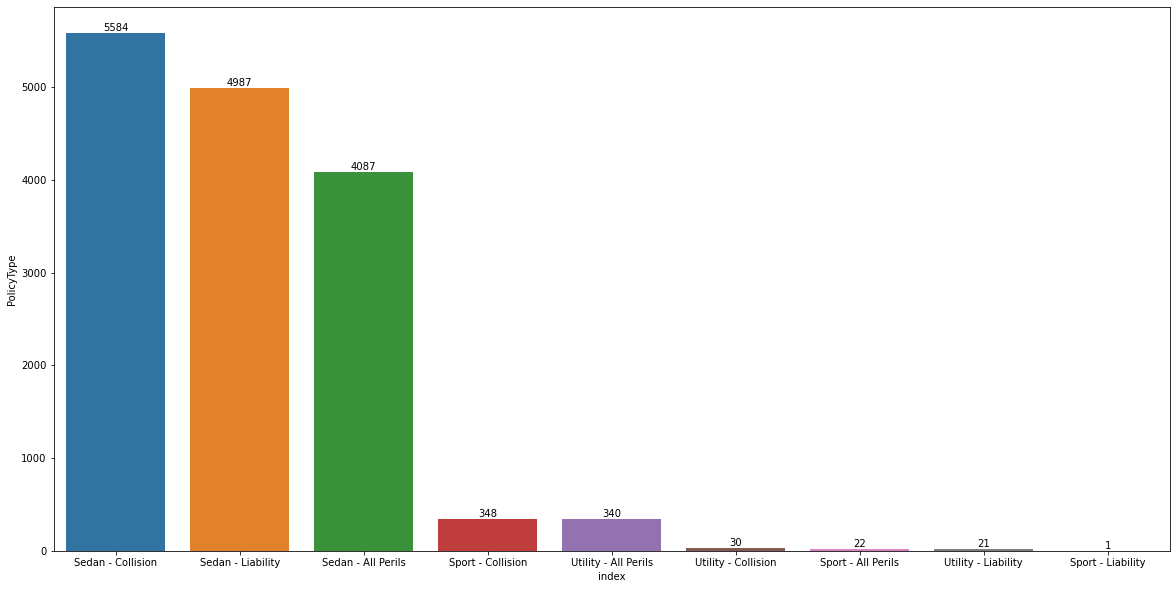

In [42]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x ='index',y = 'PolicyType' , data = PolicyType )
ax.bar_label(ax.containers[0])[0]
plt.show()

In [43]:
# VehicleCategory = Vehicle categorization
VehicleCategory = df['VehicleCategory'].value_counts().reset_index()
VehicleCategory

,index,VehicleCategory
0,Sedan,9671
1,Sport,5358
2,Utility,391


[]

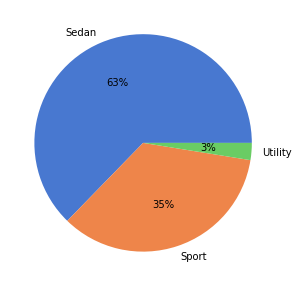

In [44]:
x = VehicleCategory['index'].tolist()
y = VehicleCategory['VehicleCategory'].tolist()
plt.figure(figsize=(5,5))
palette_color = sns.color_palette('muted')
plt.pie(y, labels=x,colors=palette_color, autopct='%.0f%%')[0]
plt.plot()

### Observation

- More than 50 % of car type is Sedan
- This is the main reason why most of the insurance type/take by Sedan type vehicle 

In [45]:
# VehiclePrice = Price of the vehicle
VehiclePrice = df['VehiclePrice'].value_counts().reset_index()

In [46]:
VehiclePrice

,index,VehiclePrice
0,20000 to 29000,8079
1,30000 to 39000,3533
2,more than 69000,2164
3,less than 20000,1096
4,40000 to 59000,461
5,60000 to 69000,87


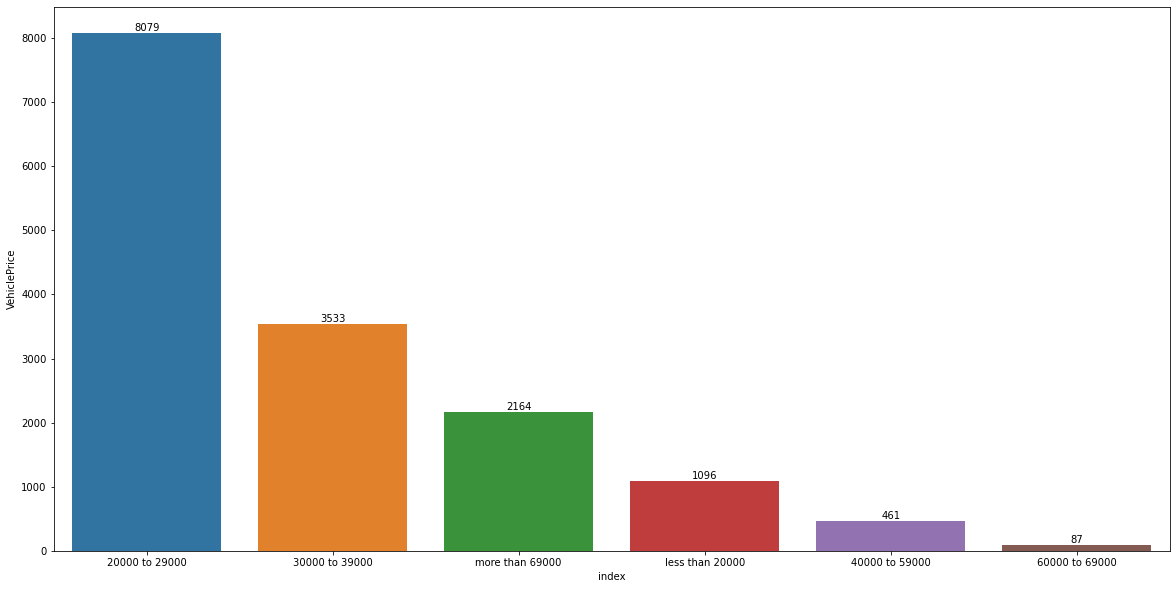

[]

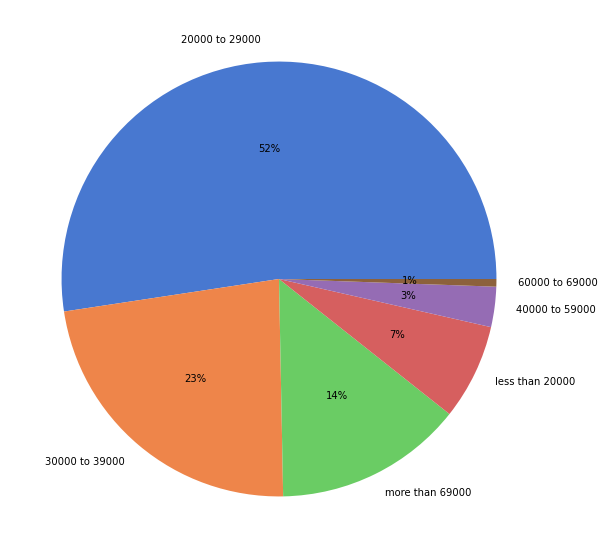

In [47]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x ='index',y = 'VehiclePrice' , data = VehiclePrice )
ax.bar_label(ax.containers[0])[0]
plt.show()


x = VehiclePrice['index'].tolist()
y = VehiclePrice['VehiclePrice'].tolist()
plt.figure(figsize=(10,10))
palette_color = sns.color_palette('muted')
plt.pie(y, labels=x,colors=palette_color, autopct='%.0f%%')[0]
plt.plot()

- More than 50% of cars price range in between 20000 to 29000

In [48]:
# RepNumber = Enumeration between 1 and 16

RepNumber = df['RepNumber'].value_counts().reset_index()
RepNumber

,index,RepNumber
0,7,1069
1,9,999
2,1,987
3,5,987
4,10,986
5,12,977
6,15,977
7,16,967
8,2,956
9,3,949


In [49]:
#Deductible = Insurance cost

Deductible = df['Deductible'].value_counts().reset_index()

In [50]:
Deductible

,index,Deductible
0,400,14838
1,700,311
2,500,263
3,300,8


[]

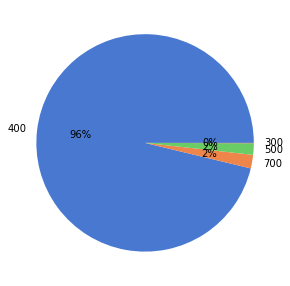

In [51]:
x = Deductible['index'].tolist()
y = Deductible['Deductible'].tolist()
plt.figure(figsize=(5,5))
palette_color = sns.color_palette('muted')
plt.pie(y, labels=x,colors=palette_color, autopct='%.0f%%')[0]
plt.plot()

- 96% of Insurance cost fee is 400.

In [52]:
# DriverRating = This driver rating might be ordinal
DriverRating = df.DriverRating.value_counts().reset_index()
DriverRating

,index,DriverRating
0,1,3944
1,3,3884
2,2,3801
3,4,3791


[]

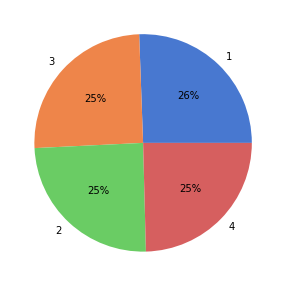

In [53]:
x = DriverRating['index'].tolist()
y = DriverRating['DriverRating'].tolist()
plt.figure(figsize=(5,5))
palette_color = sns.color_palette('muted')
plt.pie(y, labels=x,colors=palette_color, autopct='%.0f%%')[0]
plt.plot()

- Driver Rating doesnt effect the accident rate

In [54]:
# Days_Policy_Accident = Days between Insurance is acquired and the accident occurred

Days_Policy_Accident = df.Days_Policy_Accident.value_counts().reset_index()
Days_Policy_Accident

,index,Days_Policy_Accident
0,more than 30,15302
1,8 to 15,55
2,15 to 30,49
3,1 to 7,14


[]

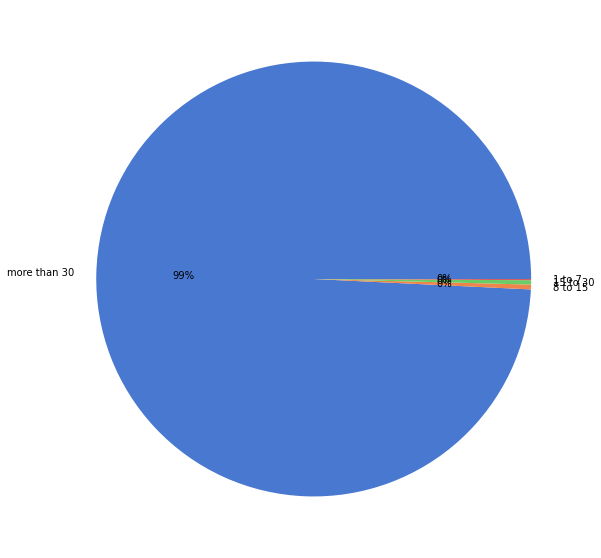

In [55]:
x = Days_Policy_Accident['index'].tolist()
y = Days_Policy_Accident['Days_Policy_Accident'].tolist()
plt.figure(figsize=(10,10))
palette_color = sns.color_palette('muted')
plt.pie(y, labels=x,colors=palette_color, autopct='%.0f%%')[0]
plt.plot()

- We are not using this variable in over ML modal as it will case 99 % data showing More than 30 this result is bias . 

In [56]:
PastNumberOfClaims = df.PastNumberOfClaims.value_counts().reset_index()
PastNumberOfClaims

,index,PastNumberOfClaims
0,2 to 4,5485
1,none,4352
2,1,3573
3,more than 4,2010


[]

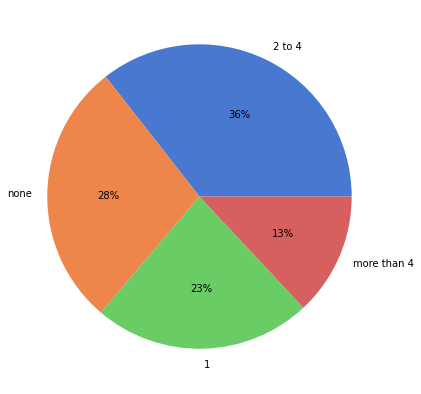

In [57]:
x = PastNumberOfClaims['index'].tolist()
y = PastNumberOfClaims['PastNumberOfClaims'].tolist()
plt.figure(figsize=(7,7))
palette_color = sns.color_palette('muted')
plt.pie(y, labels=x,colors=palette_color, autopct='%.0f%%')[0]
plt.plot()

In [58]:
AgeOfVehicle = df.AgeOfVehicle.value_counts().reset_index()
AgeOfVehicle

,index,AgeOfVehicle
0,7 years,5807
1,more than 7,3981
2,6 years,3448
3,5 years,1357
4,new,373
5,4 years,229
6,3 years,152
7,2 years,73


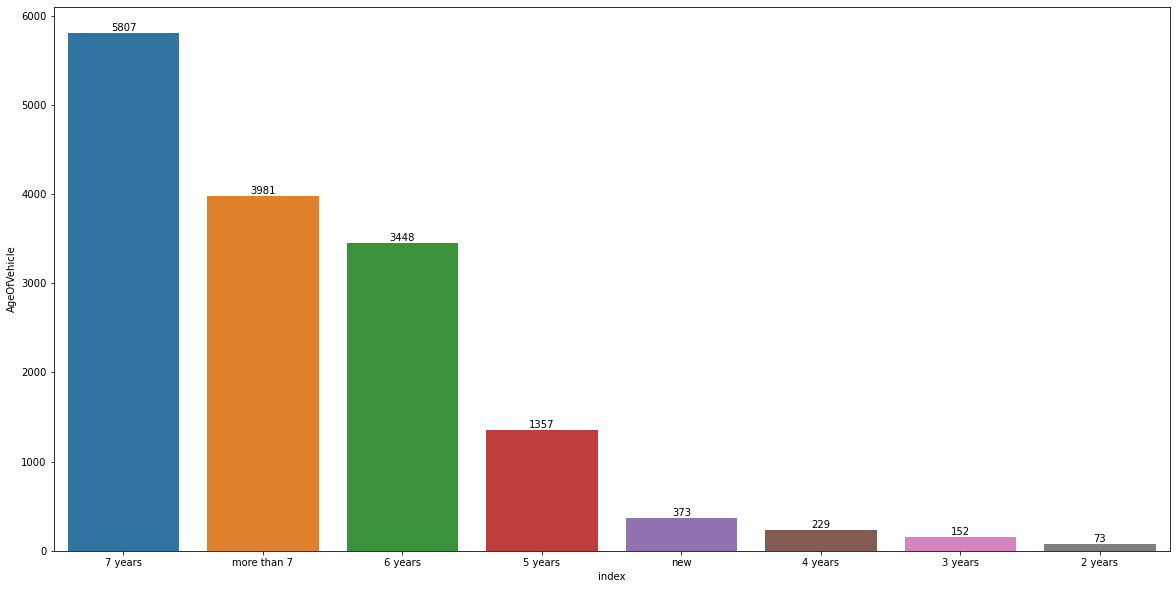

[]

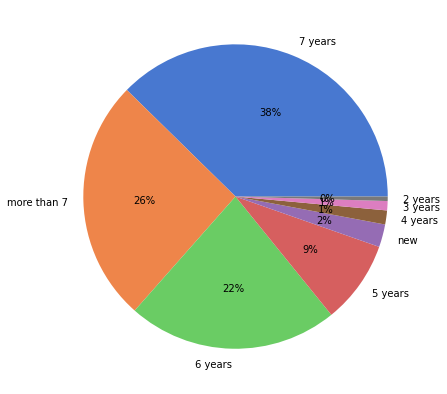

In [59]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x ='index',y = 'AgeOfVehicle' , data = AgeOfVehicle )
ax.bar_label(ax.containers[0])[0]
plt.show()

x = AgeOfVehicle['index'].tolist()
y = AgeOfVehicle['AgeOfVehicle'].tolist()
plt.figure(figsize=(7,7))
palette_color = sns.color_palette('muted')
plt.pie(y, labels=x,colors=palette_color, autopct='%.0f%%')[0]
plt.plot()

### Observation
- We can see that cars which are more tha 5 year old are claiming the insurance policy.

In [60]:
PoliceReportFiled = df.PoliceReportFiled.value_counts().reset_index()

[]

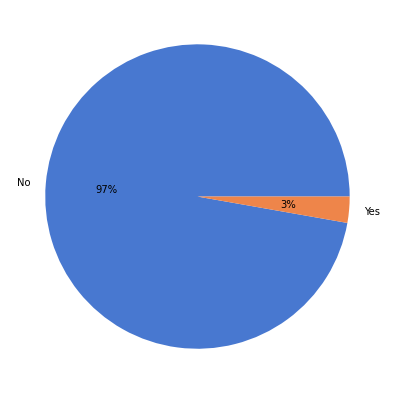

In [61]:
x = PoliceReportFiled['index'].tolist()
y = PoliceReportFiled['PoliceReportFiled'].tolist()
plt.figure(figsize=(7,7))
palette_color = sns.color_palette('muted')
plt.pie(y, labels=x,colors=palette_color, autopct='%.0f%%')[0]
plt.plot()

- Most of the time after the accident person don't report to police as most of the time person dont want to go throught police process

In [62]:
AgentType = df.AgentType.value_counts().reset_index()
AgentType

,index,AgentType
0,External,15179
1,Internal,241


In [63]:
df.WitnessPresent.value_counts().reset_index()

,index,WitnessPresent
0,No,15333
1,Yes,87


In [64]:
#NumberOfSuppliments =Supplements are non-registered damages in the car, 
#                     because they are not easily visible, usually internal components like suspension, chassis, etc.

NumberOfSuppliments = df.NumberOfSuppliments.value_counts().reset_index()
NumberOfSuppliments

,index,NumberOfSuppliments
0,none,7047
1,more than 5,3867
2,1 to 2,2489
3,3 to 5,2017


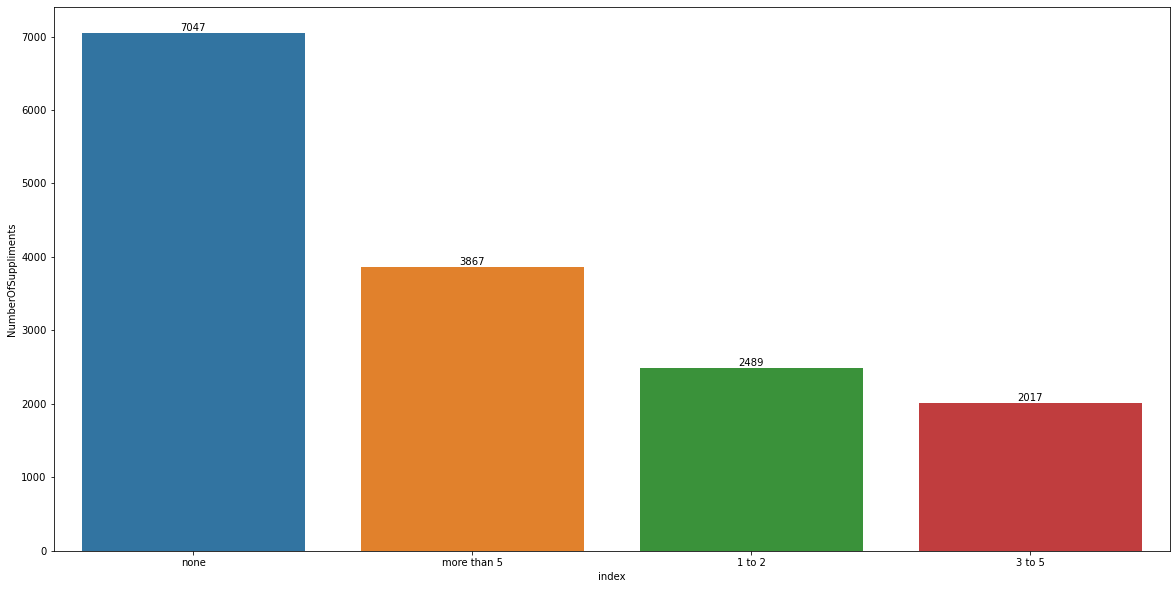

[]

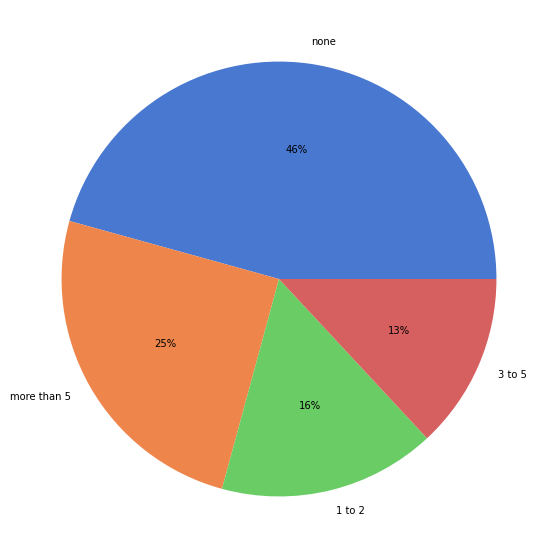

In [65]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x ='index',y = 'NumberOfSuppliments' , data = NumberOfSuppliments )
ax.bar_label(ax.containers[0])[0]
plt.show()


x = NumberOfSuppliments['index'].tolist()
y = NumberOfSuppliments['NumberOfSuppliments'].tolist()
plt.figure(figsize=(10,10))
palette_color = sns.color_palette('muted')
plt.pie(y, labels=x,colors=palette_color, autopct='%.0f%%')[0]
plt.plot()

- Most of the time over 54% times their is some sort internal damge which cant see visually.

In [66]:
AddressChange_Claim = df.AddressChange_Claim.value_counts().reset_index()
AddressChange_Claim

,index,AddressChange_Claim
0,no change,14324
1,4 to 8 years,631
2,2 to 3 years,291
3,1 year,170
4,under 6 months,4


In [67]:
NumberOfCars =df.NumberOfCars.value_counts().reset_index()
NumberOfCars

,index,NumberOfCars
0,1 vehicle,14316
1,2 vehicles,709
2,3 to 4,372
3,5 to 8,21
4,more than 8,2


[]

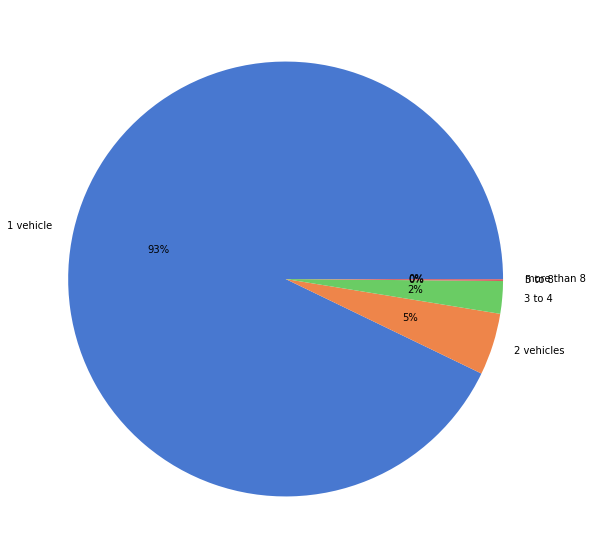

In [68]:
x = NumberOfCars['index'].tolist()
y = NumberOfCars['NumberOfCars'].tolist()
plt.figure(figsize=(10,10))
palette_color = sns.color_palette('muted')
plt.pie(y, labels=x,colors=palette_color, autopct='%.0f%%')[0]
plt.plot()

- Most of the time only one car is involved in accident

In [69]:
df.Year.value_counts()

1994    6142
1995    5195
1996    4083
Name: Year, dtype: int64

In [70]:
BasePolicy = df.BasePolicy.value_counts().reset_index()
BasePolicy

,index,BasePolicy
0,Collision,5962
1,Liability,5009
2,All Perils,4449


[]

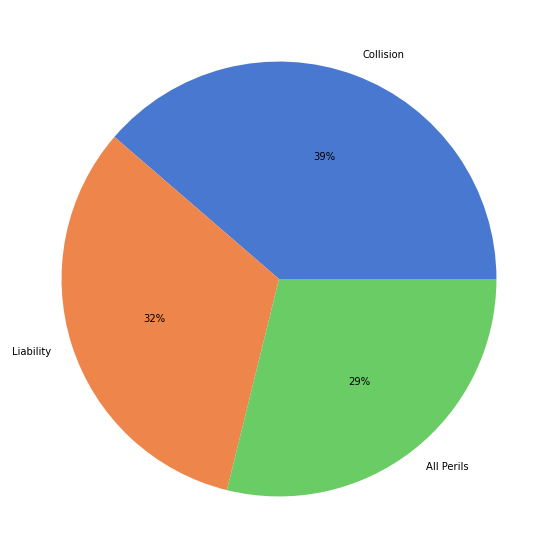

In [71]:
x = BasePolicy['index'].tolist()
y = BasePolicy['BasePolicy'].tolist()
plt.figure(figsize=(10,10))
palette_color = sns.color_palette('muted')
plt.pie(y, labels=x,colors=palette_color, autopct='%.0f%%')[0]
plt.plot()

### Bivariate Analysis of categorical vs numerical variables (Taking target variable as fixed variable here)

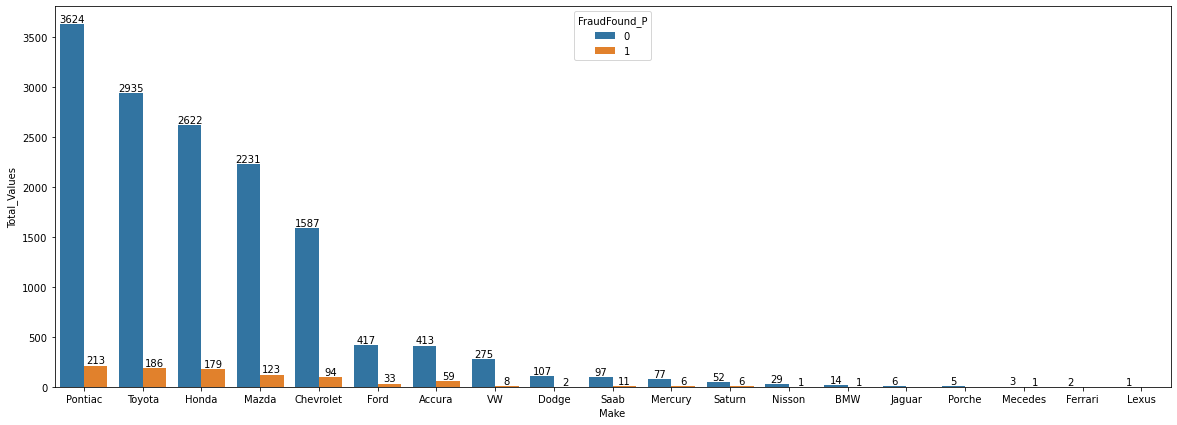

In [72]:
Make =df.groupby('FraudFound_P').agg(Total_Values=('Make', 'value_counts')).reset_index()

plt.figure(figsize=(20,7))
ax =sns.barplot(data=Make, x="Make", y="Total_Values" ,hue = "FraudFound_P")
ax.bar_label(ax.containers[1])[0]
ax.bar_label(ax.containers[0])[0]
plt.show()

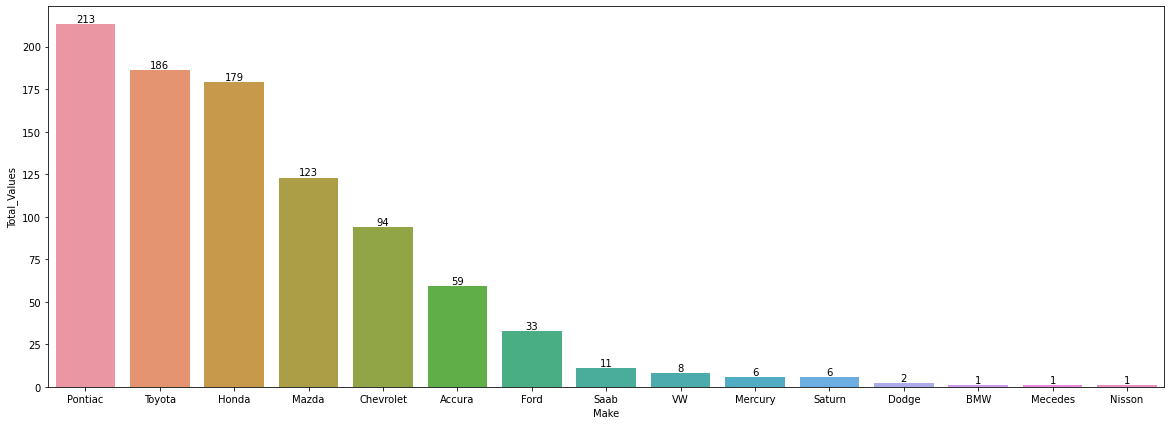

In [73]:
Fur_Make = Make[Make.FraudFound_P == 1]

plt.figure(figsize=(20,7))
ax =sns.barplot(data=Fur_Make, x="Make", y="Total_Values" )
ax.bar_label(ax.containers[0])[0]
plt.show()

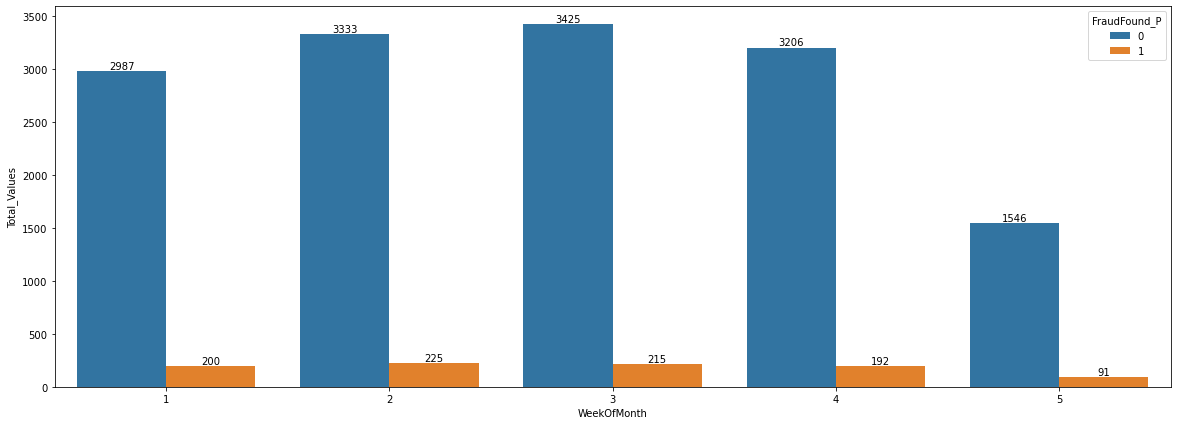

In [74]:
WeekOfMonth =df.groupby('FraudFound_P').agg(Total_Values=('WeekOfMonth', 'value_counts')).reset_index()

plt.figure(figsize=(20,7))
ax =sns.barplot(data= WeekOfMonth, x="WeekOfMonth", y="Total_Values" ,hue = "FraudFound_P")
ax.bar_label(ax.containers[1])[0]
ax.bar_label(ax.containers[0])[0]
plt.show()

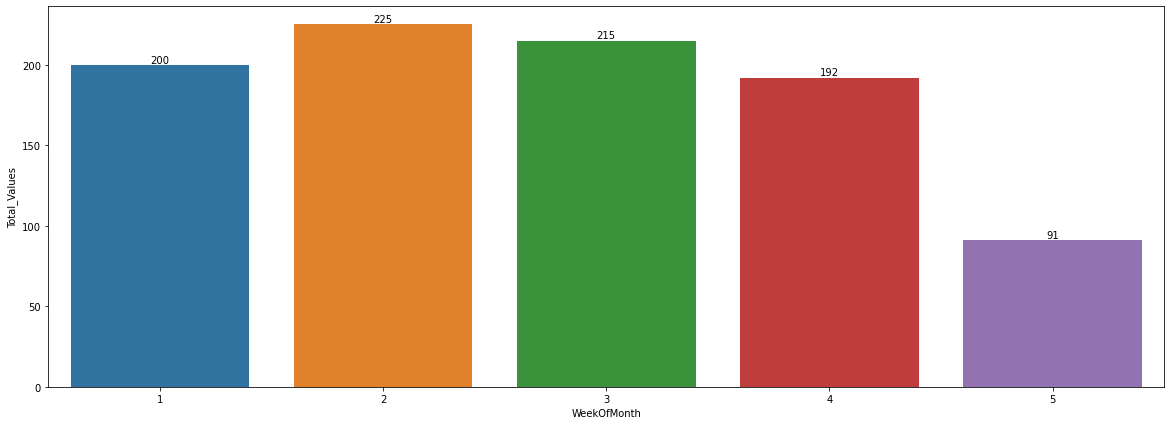

In [75]:
Fur_WeekOfMonth = WeekOfMonth[WeekOfMonth.FraudFound_P == 1]

plt.figure(figsize=(20,7))
ax =sns.barplot(data=Fur_WeekOfMonth, x="WeekOfMonth", y="Total_Values" )
ax.bar_label(ax.containers[0])[0]
plt.show()

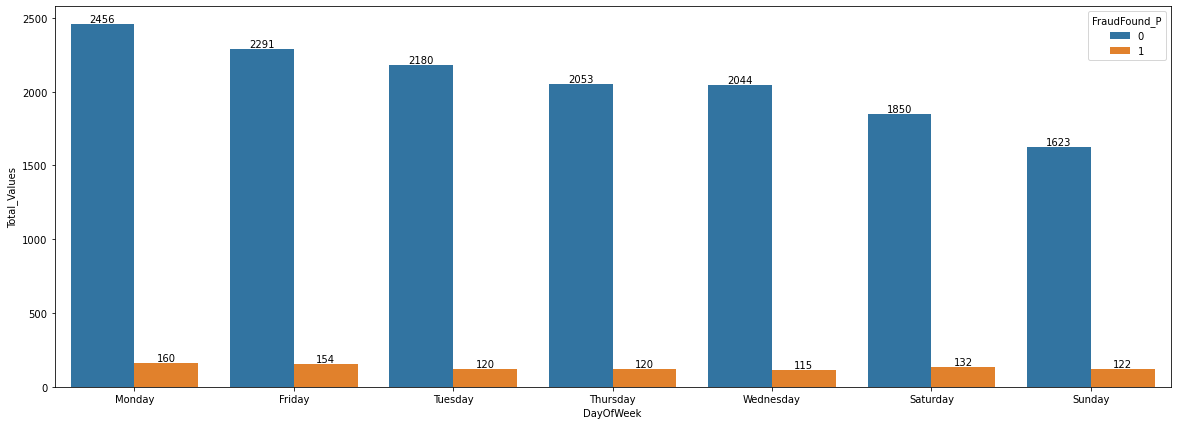

In [76]:
DayOfWeek =df.groupby('FraudFound_P').agg(Total_Values=('DayOfWeek', 'value_counts')).reset_index()

plt.figure(figsize=(20,7))
ax =sns.barplot(data= DayOfWeek, x="DayOfWeek", y="Total_Values" ,hue = "FraudFound_P")
ax.bar_label(ax.containers[1])[0]
ax.bar_label(ax.containers[0])[0]
plt.show()

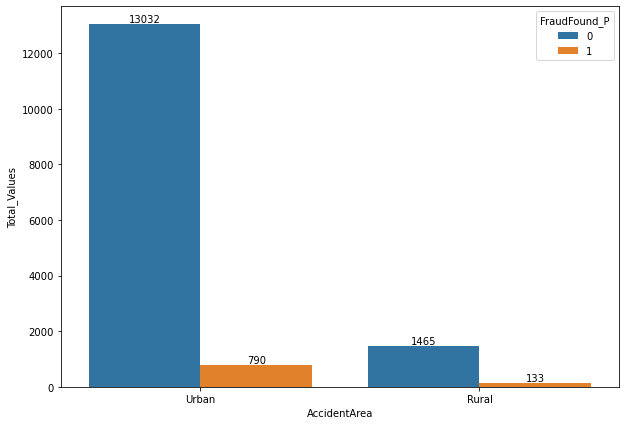

In [77]:
AccidentArea =df.groupby('FraudFound_P').agg(Total_Values=('AccidentArea', 'value_counts')).reset_index()

plt.figure(figsize=(10,7))
ax =sns.barplot(data= AccidentArea, x="AccidentArea", y="Total_Values" ,hue = "FraudFound_P")
ax.bar_label(ax.containers[1])[0]
ax.bar_label(ax.containers[0])[0]
plt.show()

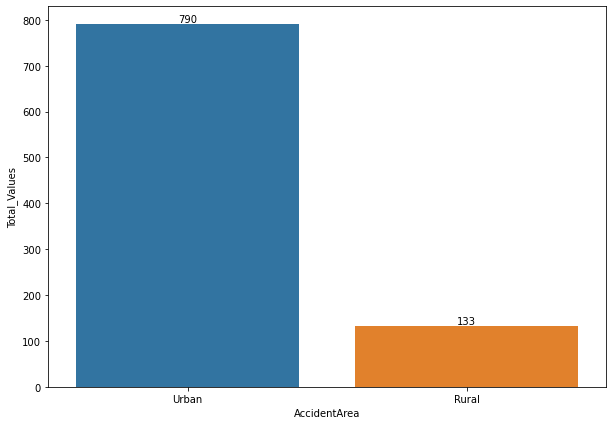

In [78]:
Fur_AccidentArea = AccidentArea[AccidentArea.FraudFound_P == 1]

plt.figure(figsize=(10,7))
ax =sns.barplot(data=Fur_AccidentArea, x="AccidentArea", y="Total_Values" )
ax.bar_label(ax.containers[0])[0]
plt.show()

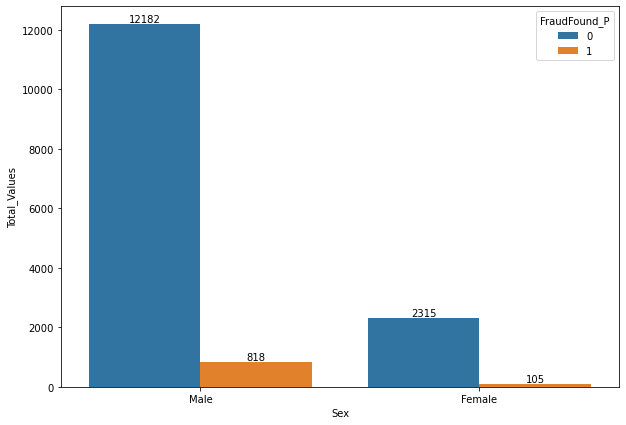

In [79]:
Sex =df.groupby('FraudFound_P').agg(Total_Values=('Sex', 'value_counts')).reset_index()

plt.figure(figsize=(10,7))
ax =sns.barplot(data= Sex, x="Sex", y="Total_Values" ,hue = "FraudFound_P")
ax.bar_label(ax.containers[1])[0]
ax.bar_label(ax.containers[0])[0]
plt.show()

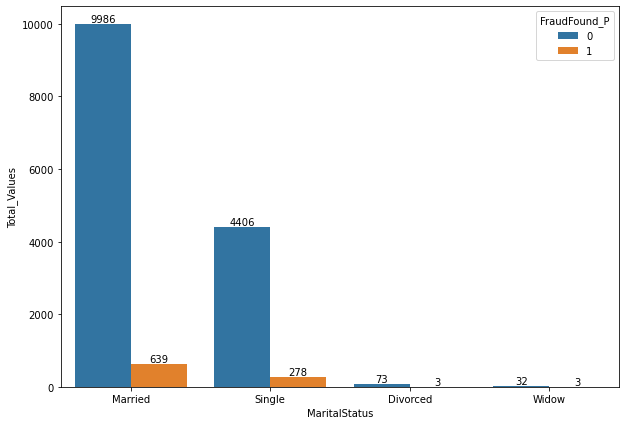

In [80]:
MaritalStatus =df.groupby('FraudFound_P').agg(Total_Values=('MaritalStatus', 'value_counts')).reset_index()

plt.figure(figsize=(10,7))
ax =sns.barplot(data= MaritalStatus, x="MaritalStatus", y="Total_Values" ,hue = "FraudFound_P")
ax.bar_label(ax.containers[1])[0]
ax.bar_label(ax.containers[0])[0]
plt.show()

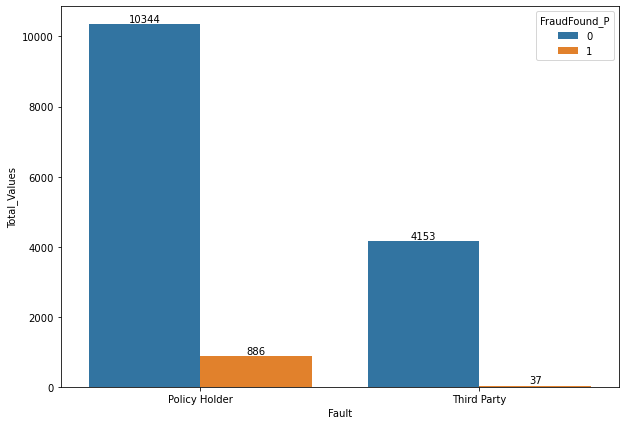

In [81]:
Fault =df.groupby('FraudFound_P').agg(Total_Values=('Fault', 'value_counts')).reset_index()

plt.figure(figsize=(10,7))
ax =sns.barplot(data= Fault, x="Fault", y="Total_Values" ,hue = "FraudFound_P")
ax.bar_label(ax.containers[1])[0]
ax.bar_label(ax.containers[0])[0]
plt.show()

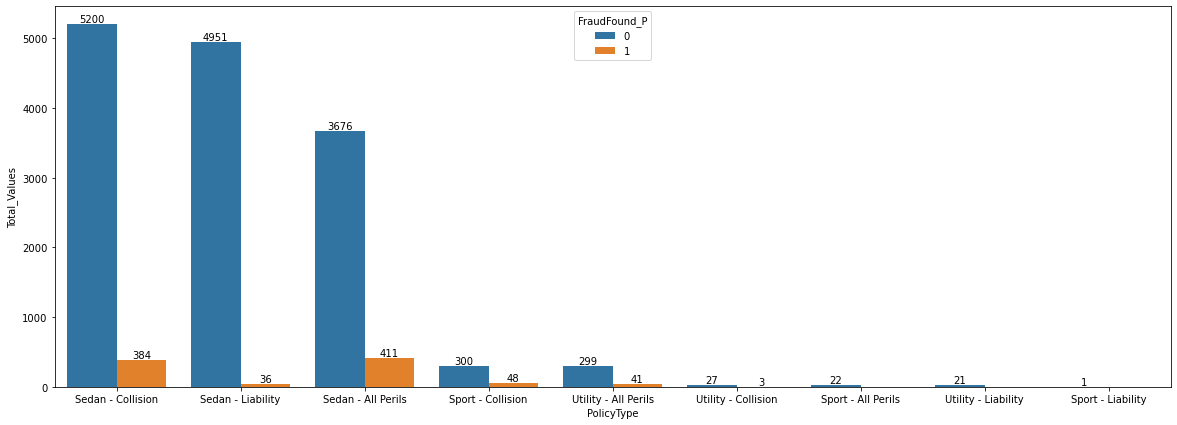

In [82]:
PolicyType =df.groupby('FraudFound_P').agg(Total_Values=('PolicyType', 'value_counts')).reset_index()

plt.figure(figsize=(20,7))
ax =sns.barplot(data= PolicyType, x="PolicyType", y="Total_Values" ,hue = "FraudFound_P")
ax.bar_label(ax.containers[1])[0]
ax.bar_label(ax.containers[0])[0]
plt.show()

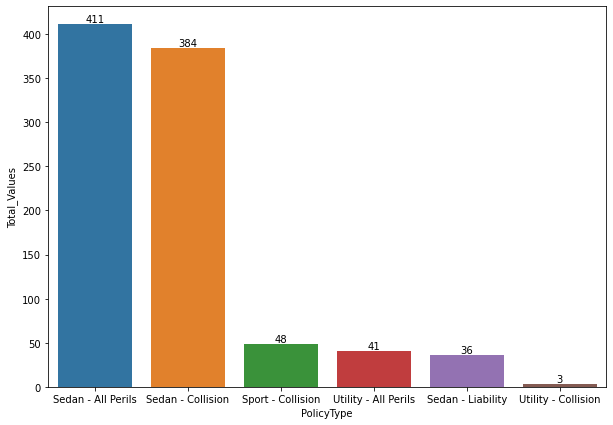

In [83]:
Fur_PolicyType = PolicyType[PolicyType.FraudFound_P == 1]

plt.figure(figsize=(10,7))
ax =sns.barplot(data=Fur_PolicyType, x="PolicyType", y="Total_Values" )
ax.bar_label(ax.containers[0])[0]
plt.show()

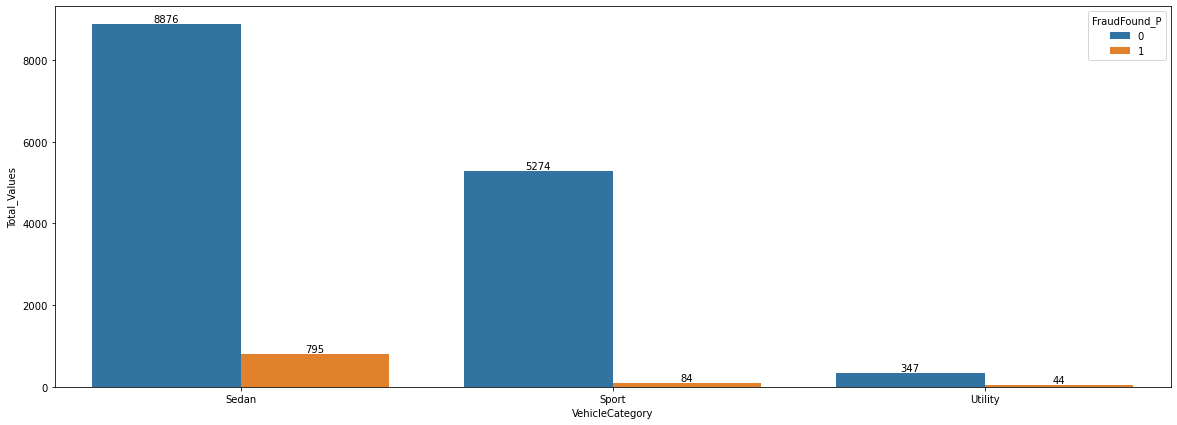

In [84]:
VehicleCategory =df.groupby('FraudFound_P').agg(Total_Values=('VehicleCategory', 'value_counts')).reset_index()

plt.figure(figsize=(20,7))
ax =sns.barplot(data= VehicleCategory, x="VehicleCategory", y="Total_Values" ,hue = "FraudFound_P")
ax.bar_label(ax.containers[1])[0]
ax.bar_label(ax.containers[0])[0]
plt.show()

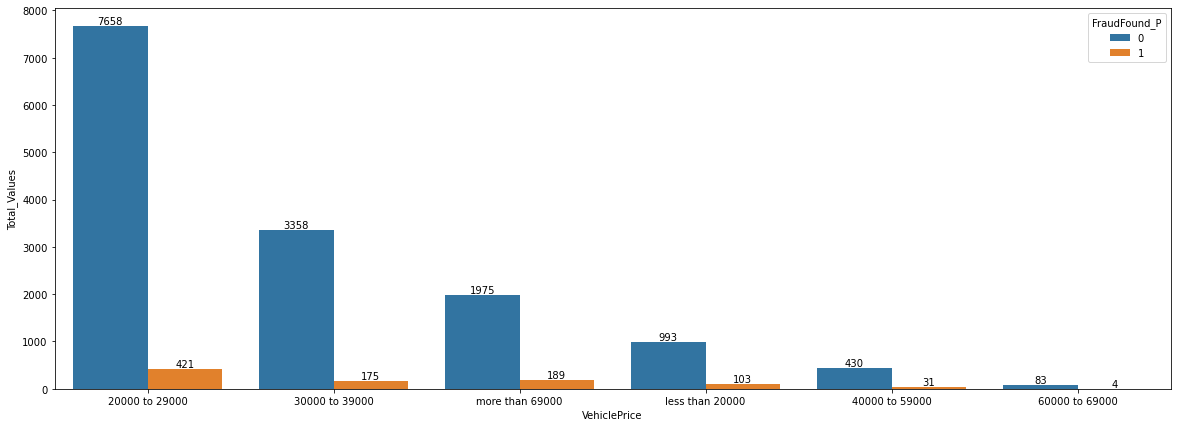

In [85]:
VehiclePrice =df.groupby('FraudFound_P').agg(Total_Values=('VehiclePrice', 'value_counts')).reset_index()

plt.figure(figsize=(20,7))
ax =sns.barplot(data= VehiclePrice, x="VehiclePrice", y="Total_Values" ,hue = "FraudFound_P")
ax.bar_label(ax.containers[1])[0]
ax.bar_label(ax.containers[0])[0]
plt.show()

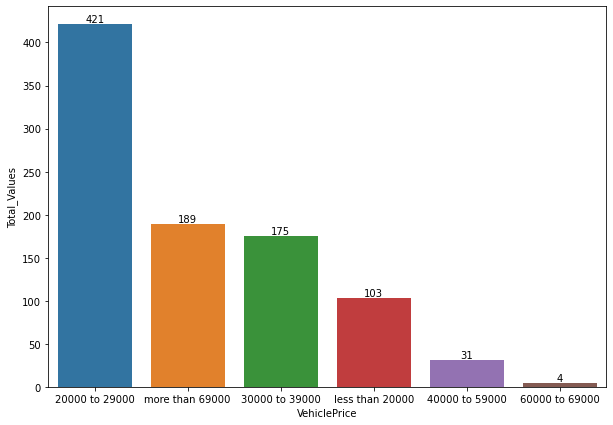

In [86]:
Fur_VehiclePrice = VehiclePrice[VehiclePrice.FraudFound_P == 1]

plt.figure(figsize=(10,7))
ax =sns.barplot(data=Fur_VehiclePrice, x="VehiclePrice", y="Total_Values" )
ax.bar_label(ax.containers[0])[0]
plt.show()

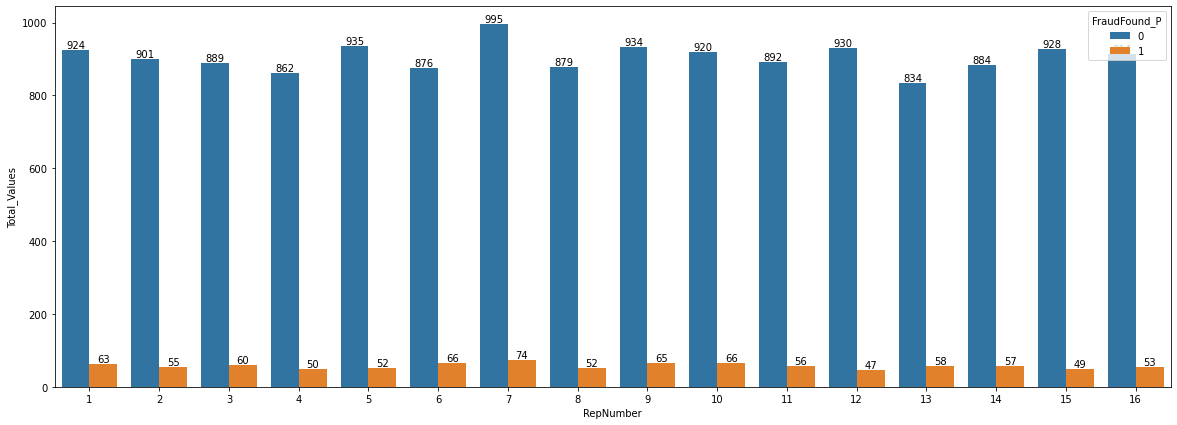

In [87]:
RepNumber =df.groupby('FraudFound_P').agg(Total_Values=('RepNumber', 'value_counts')).reset_index().sort_values(["Total_Values"])

plt.figure(figsize=(20,7))
ax =sns.barplot(data= RepNumber, x="RepNumber", y="Total_Values" ,hue = "FraudFound_P")
ax.bar_label(ax.containers[1])[0]
ax.bar_label(ax.containers[0])[0]
plt.show()

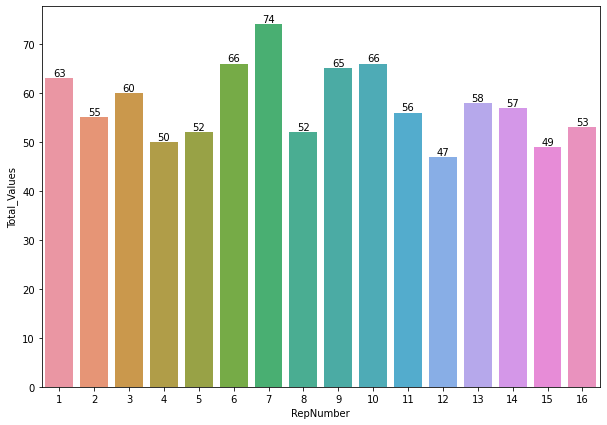

In [88]:
Fur_RepNumber = RepNumber[RepNumber.FraudFound_P == 1]
plt.figure(figsize=(10,7))
ax =sns.barplot(data=Fur_RepNumber, x="RepNumber", y="Total_Values" )
ax.bar_label(ax.containers[0])[0]
plt.show()

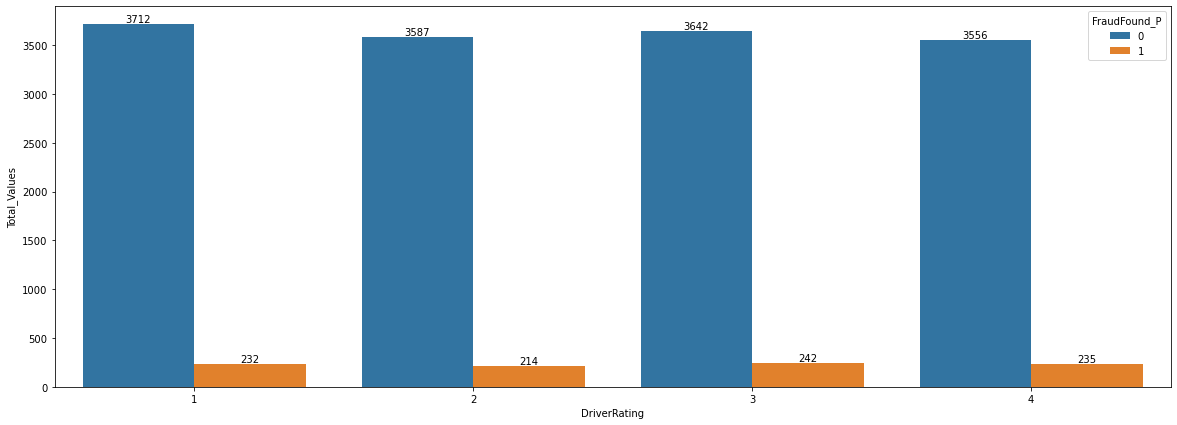

In [89]:
DriverRating =df.groupby('FraudFound_P').agg(Total_Values=('DriverRating', 'value_counts')).reset_index()
plt.figure(figsize=(20,7))
ax =sns.barplot(data= DriverRating, x="DriverRating", y="Total_Values" ,hue = "FraudFound_P")
ax.bar_label(ax.containers[1])[0]
ax.bar_label(ax.containers[0])[0]
plt.show()

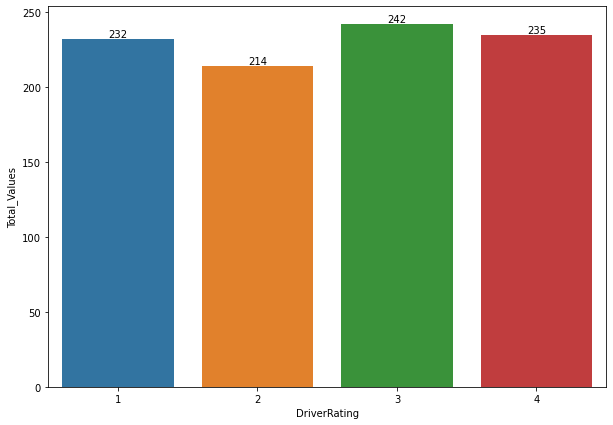

In [90]:
Fur_DriverRating = DriverRating[DriverRating.FraudFound_P == 1]
plt.figure(figsize=(10,7))
ax =sns.barplot(data=Fur_DriverRating, x="DriverRating", y="Total_Values" )
ax.bar_label(ax.containers[0])[0]
plt.show()

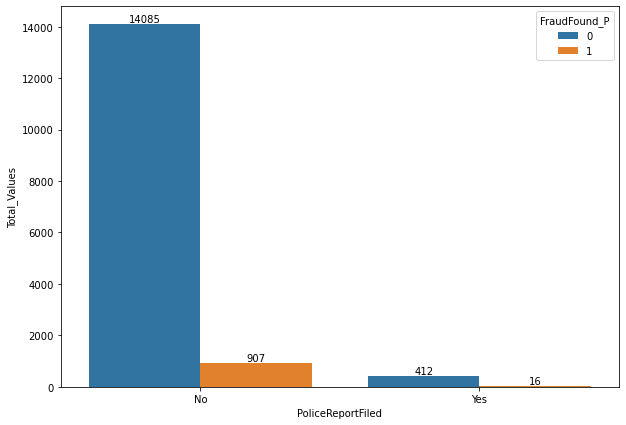

In [91]:
PoliceReportFiled =df.groupby('FraudFound_P').agg(Total_Values=('PoliceReportFiled', 'value_counts')).reset_index()
plt.figure(figsize=(10,7))
ax =sns.barplot(data= PoliceReportFiled, x="PoliceReportFiled", y="Total_Values" ,hue = "FraudFound_P")
ax.bar_label(ax.containers[1])[0]
ax.bar_label(ax.containers[0])[0]
plt.show()

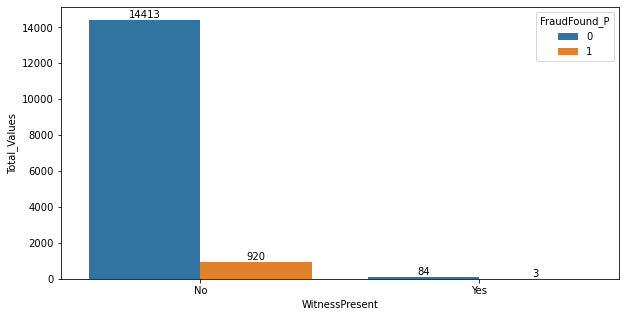

In [92]:
WitnessPresent =df.groupby('FraudFound_P').agg(Total_Values=('WitnessPresent', 'value_counts')).reset_index()
plt.figure(figsize=(10,5))
ax =sns.barplot(data= WitnessPresent, x="WitnessPresent", y="Total_Values" ,hue = "FraudFound_P")
ax.bar_label(ax.containers[1])[0]
ax.bar_label(ax.containers[0])[0]
plt.show()

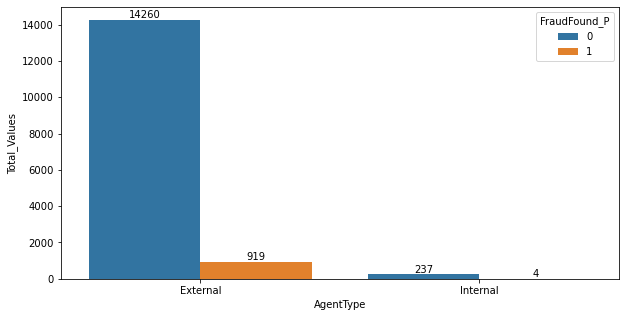

In [93]:
AgentType =df.groupby('FraudFound_P').agg(Total_Values=('AgentType', 'value_counts')).reset_index()
plt.figure(figsize=(10,5))
ax =sns.barplot(data= AgentType, x="AgentType", y="Total_Values" ,hue = "FraudFound_P")
ax.bar_label(ax.containers[1])[0]
ax.bar_label(ax.containers[0])[0]
plt.show()

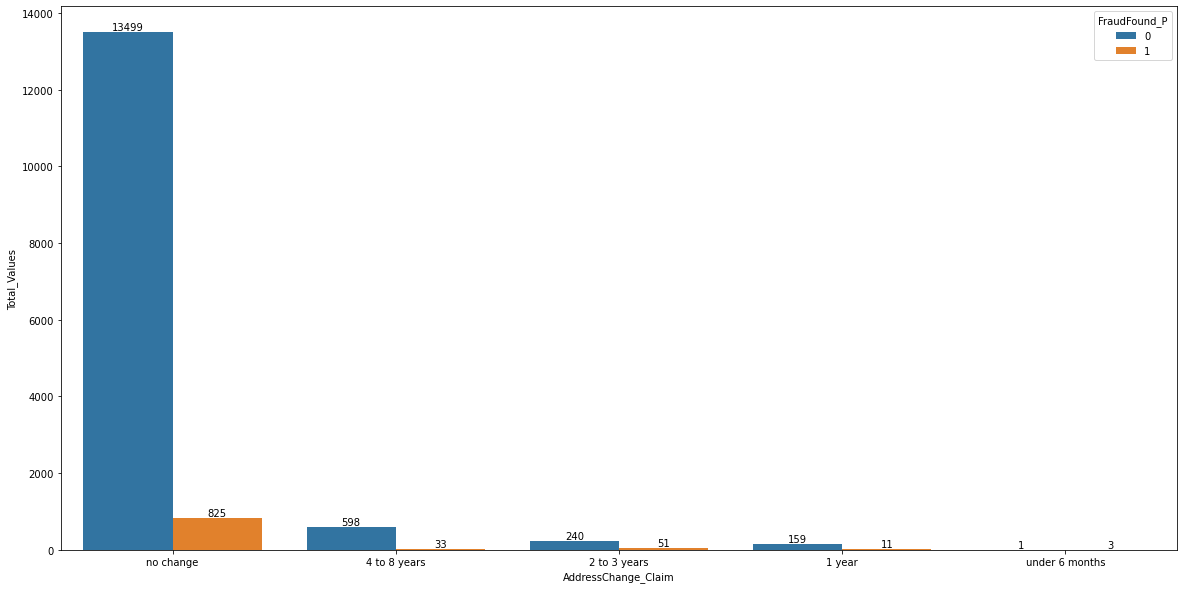

In [94]:
AddressChange_Claim =df.groupby('FraudFound_P').agg(Total_Values=('AddressChange_Claim', 'value_counts')).reset_index()
plt.figure(figsize=(20,10))
ax =sns.barplot(data= AddressChange_Claim, x="AddressChange_Claim", y="Total_Values" ,hue = "FraudFound_P")
ax.bar_label(ax.containers[1])[0]
ax.bar_label(ax.containers[0])[0]
plt.show()

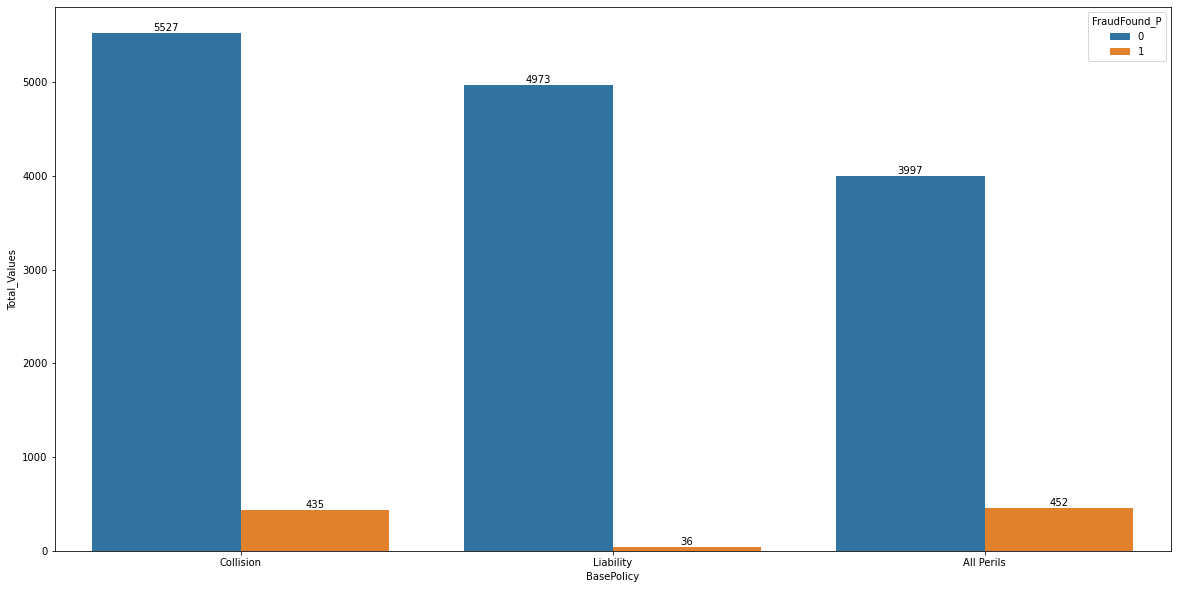

In [95]:
BasePolicy = df.groupby('FraudFound_P').agg(Total_Values=('BasePolicy', 'value_counts')).reset_index()
plt.figure(figsize=(20,10))
ax =sns.barplot(data= BasePolicy, x="BasePolicy", y="Total_Values" ,hue = "FraudFound_P")
ax.bar_label(ax.containers[1])[0]
ax.bar_label(ax.containers[0])[0]
plt.show()

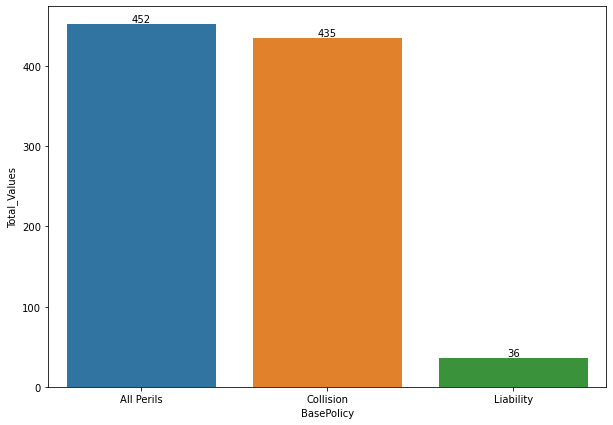

In [96]:
Fur_BasePolicy = BasePolicy[BasePolicy.FraudFound_P == 1]
plt.figure(figsize=(10,7))
ax =sns.barplot(data=Fur_BasePolicy, x="BasePolicy", y="Total_Values" )
ax.bar_label(ax.containers[0])[0]
plt.show()

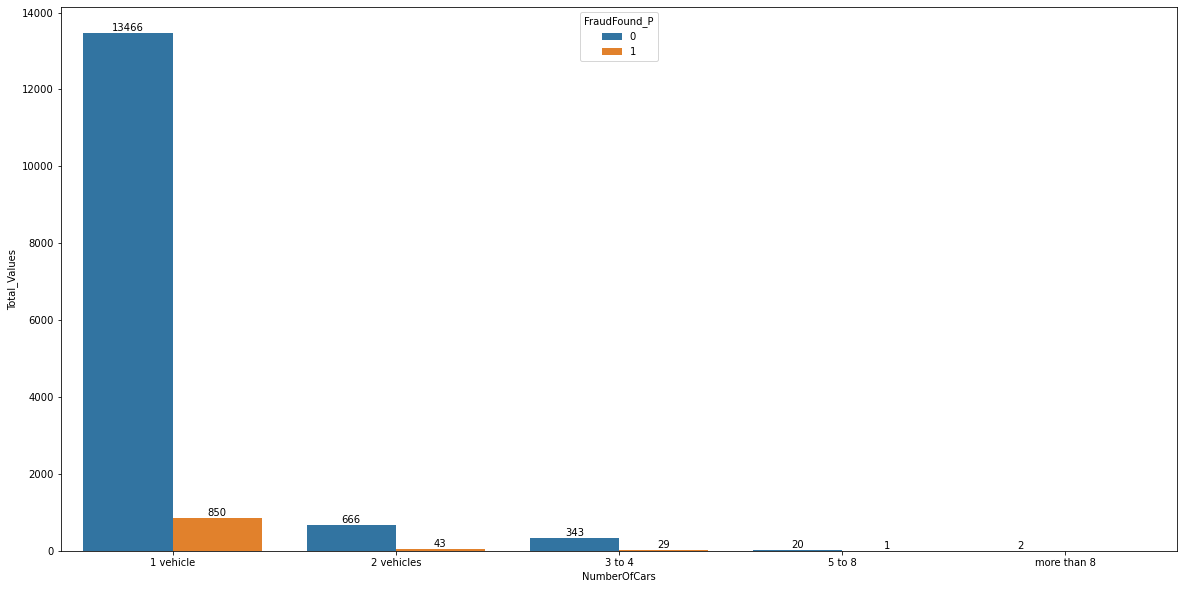

In [97]:
NumberOfCars = df.groupby('FraudFound_P').agg(Total_Values=('NumberOfCars', 'value_counts')).reset_index()
plt.figure(figsize=(20,10))
ax =sns.barplot(data= NumberOfCars, x="NumberOfCars", y="Total_Values" ,hue = "FraudFound_P")
ax.bar_label(ax.containers[1])[0]
ax.bar_label(ax.containers[0])[0]
plt.show()

In [98]:
df.groupby('DriverRating').agg(Total_Values = ('Fault',"value_counts")).reset_index()

,DriverRating,Fault,Total_Values
0,1,Policy Holder,2824
1,1,Third Party,1120
2,2,Policy Holder,2802
3,2,Third Party,999
4,3,Policy Holder,2827
5,3,Third Party,1057
6,4,Policy Holder,2777
7,4,Third Party,1014


In [99]:
corr_matrix = df.corr()

In [100]:
corr_matrix.FraudFound_P

WeekOfMonth          -0.011861
WeekOfMonthClaimed   -0.005761
PolicyNumber         -0.020345
Age                  -0.027389
FraudFound_P          1.000000
RepNumber            -0.007551
Deductible            0.017348
DriverRating          0.007266
Year                 -0.024760
Name: FraudFound_P, dtype: float64

# Data Pre-Processing

In [101]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,PolicyNumber,Sex,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,1,Female,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,2,Male,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,3,Male,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,4,Male,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,5,Female,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [102]:
df['AccidentArea'].unique()

array(['Urban', 'Rural'], dtype=object)

In [103]:
# Converting AccidentArea into numeric :
df.AccidentArea.replace(['Urban', 'Rural'],[0,1],inplace= True)

In [104]:
df['AccidentArea'].unique()

array([0, 1], dtype=int64)

In [105]:
df['MonthClaimed'].unique()

array(['Jan', 'Nov', 'Jul', 'Feb', 'Mar', 'Dec', 'Apr', 'Aug', 'May',
       'Jun', 'Sep', 'Oct'], dtype=object)

In [106]:
# Converting data in Numeric
df.MonthClaimed.replace(['Jan', 'Nov', 'Jul', 'Feb', 'Mar', 'Dec', 'Apr', 'Aug', 'May',
       'Jun', 'Sep', 'Oct'],[1,11,7,2,3,12,4,8,5,6,9,10],inplace= True)

In [107]:
df['MonthClaimed'].unique()

array([ 1, 11,  7,  2,  3, 12,  4,  8,  5,  6,  9, 10], dtype=int64)

In [108]:
df['DayOfWeekClaimed'].unique()

array(['Tuesday', 'Monday', 'Thursday', 'Friday', 'Wednesday', 'Saturday',
       'Sunday'], dtype=object)

In [109]:
df['DayOfWeekClaimed'].replace(['Tuesday', 'Monday', 'Thursday', 'Friday', 'Wednesday', 'Saturday',
       'Sunday'],[2,1,4,5,3,6,7],inplace=True)

In [110]:
df['DayOfWeekClaimed'].unique()

array([2, 1, 4, 5, 3, 6, 7], dtype=int64)

In [111]:
df['Sex'].replace(['Female', 'Male'],[0,1],inplace=True)

In [112]:
df['Sex'].unique()

array([0, 1], dtype=int64)

In [113]:
df.Fault.unique()

array(['Policy Holder', 'Third Party'], dtype=object)

In [114]:
# Converting Into Numeric
df.Fault.replace(['Policy Holder', 'Third Party'],[0,1],inplace = True)

In [115]:
df.Fault.unique()

array([0, 1], dtype=int64)

In [116]:
df.DayOfWeek.unique()

array(['Wednesday', 'Friday', 'Saturday', 'Monday', 'Tuesday', 'Sunday',
       'Thursday'], dtype=object)

In [117]:
df['DayOfWeek'].replace(['Tuesday', 'Monday', 'Thursday', 'Friday', 'Wednesday', 'Saturday',
       'Sunday'],[2,1,4,5,3,6,7],inplace=True)

In [118]:
df.DayOfWeek.unique()

array([3, 5, 6, 1, 2, 7, 4], dtype=int64)

In [119]:
df.MaritalStatus.unique()

array(['Single', 'Married', 'Widow', 'Divorced'], dtype=object)

In [120]:
df['Month'].unique()

array(['Dec', 'Jan', 'Oct', 'Jun', 'Feb', 'Nov', 'Apr', 'Mar', 'Aug',
       'Jul', 'May', 'Sep'], dtype=object)

In [121]:
# Converting data in Numeric
df.Month.replace(['Jan', 'Nov', 'Jul', 'Feb', 'Mar', 'Dec', 'Apr', 'Aug', 'May',
       'Jun', 'Sep', 'Oct'],[1,11,7,2,3,12,4,8,5,6,9,10],inplace= True)

In [122]:
df['Month'].unique()

array([12,  1, 10,  6,  2, 11,  4,  3,  8,  7,  5,  9], dtype=int64)

In [123]:
df.Days_Policy_Accident.unique()

array(['more than 30', '15 to 30', '1 to 7', '8 to 15'], dtype=object)

In [124]:
# Converting data in Numeric
df.Days_Policy_Accident.replace(['more than 30', '15 to 30', '1 to 7', '8 to 15'],[35,30,7,15],inplace= True)

In [125]:
df.AgeOfVehicle.unique()

array(['3 years', '6 years', '7 years', 'more than 7', '5 years', 'new',
       '4 years', '2 years'], dtype=object)

In [126]:
# Converting data in Numeric
df.AgeOfVehicle.replace(['3 years', '6 years', '7 years', 'more than 7', '5 years', 'new',
       '4 years', '2 years'],[3,6,7,8,5,0,4,2],inplace= True)

In [127]:
df.Days_Policy_Claim.unique()

array(['more than 30', '15 to 30', '8 to 15', 'none'], dtype=object)

In [128]:
# Converting data in Numeric
df.Days_Policy_Claim.replace(['more than 30', '15 to 30', 'none', '8 to 15'],[35,30,0,15],inplace= True)

In [129]:
df.PoliceReportFiled.unique()

array(['No', 'Yes'], dtype=object)

In [130]:
df.PoliceReportFiled.replace(['No', 'Yes'],[0,1],inplace= True)

In [131]:
df.WitnessPresent.unique()

array(['No', 'Yes'], dtype=object)

In [132]:
df.WitnessPresent.replace(['No', 'Yes'],[0,1],inplace= True)

In [133]:
df.AgentType.unique()

array(['External', 'Internal'], dtype=object)

In [134]:
# Converting data in Numeric
df.AgentType.replace(['External', 'Internal'],[0,1],inplace= True)

In [135]:
df.NumberOfSuppliments.unique()

array(['none', 'more than 5', '3 to 5', '1 to 2'], dtype=object)

In [136]:
# Converting data in Numeric
df.NumberOfSuppliments.replace(['none', 'more than 5', '3 to 5', '1 to 2'],[0,6,5,3],inplace= True)

In [137]:
df.AddressChange_Claim.unique()

array(['1 year', 'no change', '4 to 8 years', '2 to 3 years',
       'under 6 months'], dtype=object)

In [138]:
# Converting data in Numeric
df.AddressChange_Claim.replace(['1 year', 'no change', '4 to 8 years', '2 to 3 years',
       'under 6 months'],[1,0,8,3,0.6],inplace= True)

In [139]:
df.NumberOfCars.unique()

array(['3 to 4', '1 vehicle', '2 vehicles', '5 to 8', 'more than 8'],
      dtype=object)

In [140]:
# Converting data in Numeric
df.NumberOfCars.replace(['3 to 4', '1 vehicle', '2 vehicles', '5 to 8', 'more than 8'],[4,1,2,8,9],inplace= True)

In [141]:
df.NumberOfCars.unique()

array([4, 1, 2, 8, 9], dtype=int64)

In [142]:
corr = df.corr()

In [143]:
corr.FraudFound_P

Month                  -0.027278
WeekOfMonth            -0.011861
DayOfWeek               0.017452
AccidentArea            0.033499
DayOfWeekClaimed        0.007994
MonthClaimed           -0.028955
WeekOfMonthClaimed     -0.005761
PolicyNumber           -0.020345
Sex                     0.029953
Age                    -0.027389
Fault                  -0.131389
FraudFound_P            1.000000
RepNumber              -0.007551
Deductible              0.017348
DriverRating            0.007266
Days_Policy_Accident   -0.007185
Days_Policy_Claim      -0.014897
AgeOfVehicle           -0.032742
PoliceReportFiled      -0.016007
WitnessPresent         -0.008057
AgentType              -0.022978
NumberOfSuppliments    -0.032310
AddressChange_Claim     0.010940
NumberOfCars            0.008680
Year                   -0.024760
Name: FraudFound_P, dtype: float64

In [144]:
ohe = pd.get_dummies(df[['Make', 'MaritalStatus','PolicyType','VehicleCategory','VehiclePrice','PastNumberOfClaims',
                         "BasePolicy"]])

In [145]:
m_df=pd.concat([df, ohe], axis=1)

In [146]:
m_df.drop(['Make', 'MaritalStatus','PolicyType','VehicleCategory','VehiclePrice','PastNumberOfClaims',
                         "BasePolicy",'AgeOfPolicyHolder'], axis=1, inplace=True)

In [147]:
m_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15420 entries, 0 to 15419
Data columns (total 73 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Month                            15420 non-null  int64  
 1   WeekOfMonth                      15420 non-null  int64  
 2   DayOfWeek                        15420 non-null  int64  
 3   AccidentArea                     15420 non-null  int64  
 4   DayOfWeekClaimed                 15420 non-null  int64  
 5   MonthClaimed                     15420 non-null  int64  
 6   WeekOfMonthClaimed               15420 non-null  int64  
 7   PolicyNumber                     15420 non-null  int64  
 8   Sex                              15420 non-null  int64  
 9   Age                              15420 non-null  int64  
 10  Fault                            15420 non-null  int64  
 11  FraudFound_P                     15420 non-null  int64  
 12  RepNumber         

# Importing ML models

### Our data is Imbalance so we try diffrent method the resolve this issue

## Under Sampling

In [148]:
legit = m_df[m_df.FraudFound_P == 0]
fraud = m_df[m_df.FraudFound_P == 1]

In [149]:
legit.shape,fraud.shape

((14497, 73), (923, 73))

In [150]:
legit_sample = legit.sample(n = 923)

In [151]:
legit_sample.shape

(923, 73)

In [152]:
final_df = pd.concat([legit_sample,fraud ],axis=0)

In [153]:
final_df.shape

(1846, 73)

In [154]:
x = final_df.drop('FraudFound_P',axis =1)
y = final_df.FraudFound_P 

In [155]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 2345)

### Logistic Regression

In [156]:
from sklearn.linear_model import LogisticRegression

In [157]:
logr = LogisticRegression()

In [158]:
logr.fit(x_train, y_train)

LogisticRegression()

In [159]:
y_pred = logr.predict(x_test)

In [160]:
from sklearn.metrics import classification_report

In [161]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.68      0.68       266
           1       0.71      0.72      0.71       288

    accuracy                           0.70       554
   macro avg       0.70      0.70      0.70       554
weighted avg       0.70      0.70      0.70       554



In [162]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [163]:
confusion_matrix(y_test,y_pred)

array([[180,  86],
       [ 80, 208]], dtype=int64)

### Random Forest

In [164]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [165]:
x_train , x_test , y_train , y_test = train_test_split(x ,y, test_size=0.2 , random_state = 134)

In [166]:
from sklearn.ensemble import RandomForestClassifier

In [167]:
rf = RandomForestClassifier()

In [168]:
rf.fit(x_train, y_train)

RandomForestClassifier()

In [169]:
y_pred=rf.predict(x_test)

In [170]:
accuracy_score(y_test,y_pred)

0.7648648648648648

In [171]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.67      0.74       181
           1       0.73      0.85      0.79       189

    accuracy                           0.76       370
   macro avg       0.77      0.76      0.76       370
weighted avg       0.77      0.76      0.76       370



# Over sampling

In [172]:
x = m_df.drop('FraudFound_P',axis =1)
y = m_df.FraudFound_P 

In [173]:
from imblearn.combine import SMOTETomek

In [174]:
smk = SMOTETomek(random_state=42)
x,y = smk.fit_resample(x,y)

In [175]:
x.shape,y.shape

((28576, 72), (28576,))

In [176]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 2345)

### Logistic Regression 

In [177]:
logr = LogisticRegression()

In [178]:
logr.fit(x_train, y_train)

LogisticRegression()

In [179]:
y_pred = logr.predict(x_test)

In [180]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80      4280
           1       0.80      0.81      0.80      4293

    accuracy                           0.80      8573
   macro avg       0.80      0.80      0.80      8573
weighted avg       0.80      0.80      0.80      8573



In [181]:
confusion_matrix(y_test,y_pred)

array([[3395,  885],
       [ 825, 3468]], dtype=int64)

### Random Forest

In [182]:
x_train , x_test , y_train , y_test = train_test_split(x ,y, test_size=0.2 , random_state = 134)

In [183]:
rf = RandomForestClassifier()

In [184]:
rf.fit(x_train, y_train)

RandomForestClassifier()

In [185]:
y_pred=rf.predict(x_test)

In [186]:
accuracy_score(y_test,y_pred)

0.9681595521343597

In [187]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2822
           1       1.00      0.94      0.97      2894

    accuracy                           0.97      5716
   macro avg       0.97      0.97      0.97      5716
weighted avg       0.97      0.97      0.97      5716



-  As usual Random Forest is best algorithm with the combination of over Sampling.